<a href="https://colab.research.google.com/github/pcpiscator/Ciencia-de-dados/blob/master/Visualiza%C3%A7%C3%A3o_eficaz_de_dados_multidimensionais_Uma_abordagem_m%C3%A3o_na_massa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizando dados multidimensionais estruturados



[Este notebook](https://colab.research.google.com/drive/1CgJir0PS_ngBpvQ_teUY8VCQ8pS0iC7w#scrollTo=SP0HYRHrFh96) é uma adaptação da Escola de Dados baseado na tradução de Cássia Sampaio do tutorial [Effective Visualization of Multi-Dimensional Data — A Hands-on Approach](https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8).O autor do texto original é Dipanjan (DJ) Sarkar. 

Ele também disponbilizou um [notebook com os códigos abaixos](https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/effective%20data%20visualization/Bonus%20-%20Effective%20Multi-dimensional%20Data%20Visualization.ipynb), acrescidos de um comentário e descrição sobre vinhos e seus tipos, que ajudam a entender melhor os dados manipulados no tutorial.

----



Vamos começar logo ao invés ficar sobrevoando a teoria e os conceitos. 

Iremos usar o [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) (dataset de qualidade do vinho) do repositório de [machine learning da UCI](https://archive.ics.uci.edu/ml/index.php). Estes dados consistem, na realidade, em dois datasets que descrevem vários atributos das qualidades das varientes tinto e branca do “Vinho Verde” português . Todas as análises deste artigo estão disponíveis [no meu repositório do GitHub](https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/bonus%20content/effective%20data%20visualization) como um Jupyter Notebook para quem estiver ansiosamente querendo experimentar!

Vamos começar carregando as seguintes dependências necessárias para nossas análises.

In [ ]:
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
warnings.filterwarnings('ignore')

%matplotlib inline

Nós usaremos principalmente matplotlib e seaborn como nossos frameworks de visualização, mas você é livre para verificar e tentar o mesmo com qualquer outro framework de sua escolha. Vamos dar uma olhada nos dados após algumas etapas básicas de pré-processamento.

In [ ]:
# Nota da Escola de Dados: Aqui, fizemos algumas alterações no código original para importarmos os CSV direto do site
vtinto = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
vbranco = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine = pd.read_csv(vbranco, sep=';')
red_wine = pd.read_csv(vtinto, sep=';')

In [ ]:
# Aqui, é armazenado o tipo de vinho como atributo
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# Agrupa os valores de qualidade do vinho em categorias qualitativas 
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# Mescla os datasets de vinho tinto e branco
wines = pd.concat([red_wine, white_wine])

# Reordena os registros apenas para deixar os pontos de dados aleatórios
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

Nós criamos um único dataframe de vinhos mesclando os datasets referentes às amostras de vinho tinto e branco. Também criamos uma nova variável categórica 'quality_label' (rotulo_qualidade) com base no atributo da qualidade das amostras de vinho. Vamos dar uma olhada nos dados agora.


In [ ]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


É evidente que temos vários atributos numéricos e categóricos para as amostras de vinho. Cada observação pertence a uma amostra de vinho tinto ou branco e os atributos são atributos específicos ou propriedades medidas e obtidas a partir de testes físico-químicos. Você pode conferir este [Jupyter Notebook se você quiser entender a explicação detalhada de cada atributo](https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/effective%20data%20visualization/Bonus%20-%20Effective%20Multi-dimensional%20Data%20Visualization.ipynb), mas os nomes são bem auto-explicativos. Vamos fazer um rápido sumário estatístico descritivo básico sobre alguns desses atributos de interesse. 


In [ ]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Estatísticas de Vinho Branco', 'Estatísticas de vinho tinto'])

Estatísticas de Vinho Branco  ... Estatísticas de vinho tinto
                    residual sugar  ...                     quality
count                      1599.00  ...                     4898.00
mean                          2.54  ...                        5.88
std                           1.41  ...                        0.89
min                           0.90  ...                        3.00
25%                           1.90  ...                        5.00
50%                           2.20  ...                        6.00
75%                           2.60  ...                        6.00
max                          15.50  ...                        9.00

[8 rows x 12 columns]

É muito fácil contrastar e comparar estas medidas estatísticas para os diferentes tipos de amostras de vinho. Observe a grande diferença em alguns dos atributos. Vamos enfatizar alguns deles nas nossas visualizações mais adiante.


# Análise Univariada
A análise univariada é basicamente a forma mais simples de análise ou visualização de dados, em que nos preocupamos apenas em analisar um atributo do dado ou variável e visualizá-lo (uma dimensão).

## Visualizando dados em uma dimensão (1-D)
Uma das formas mais rápidas e eficazes de visualizar todos os dados numéricos e suas distribuições é com os histogramas, usando pandas.


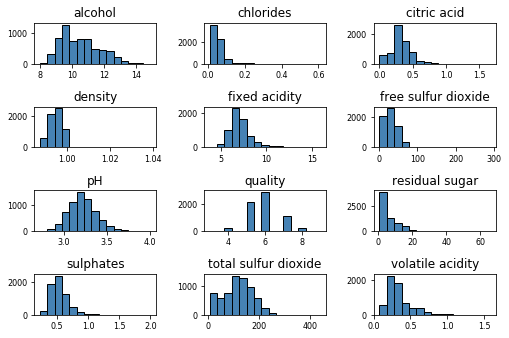

In [ ]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

Os gráficos acima dão uma boa ideia sobre a distribuição básica dos atributos dos dados.

Vamos detalhar a visualização de um dos atributos numéricos contínuos. Essencialmente, um histograma ou um gráfico de densidade funcionam muito bem para compreendermos como os dados são distribuídos para esse atributo.


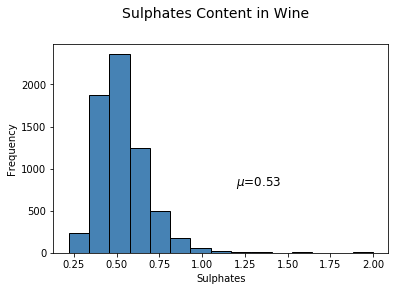

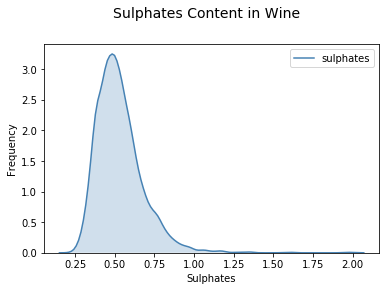

In [ ]:
# Histograma
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Gráfico de densidade
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

É bem evidente a partir do gráfico acima que existe uma [distorção à direita](https://pt.wikipedia.org/wiki/Histograma#Distorcido_%C3%A0_direita) na distribuição para os sulfatos de vinho.


A visualização de um atributo categórico discreto é um pouco diferente e os gráficos de barras são uma das maneiras mais eficazes de fazer isso. Você também pode usar gráficos de pizza, mas, em geral, tente evitá-los, especialmente quando o número de categorias for maior do que três. 

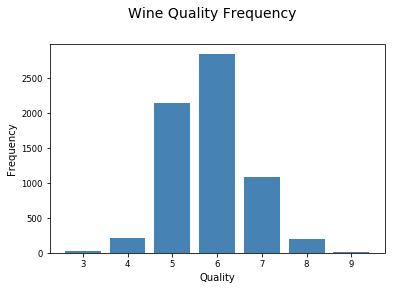

In [ ]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

*Visualizando dados discretos unidimensionais categóricos*

# Análise Multivariada

A análise multivariada é onde tanto a diversão quanto a complexidade começam. Aqui, analisamos várias dimensões ou atributos dos dados (2 ou mais). A análise multivariada envolve não apenas verificar as distribuições, mas também relações em potencial, padrões e correlações entre esses atributos. 

Você também pode usar inferências estatísticas e teste de hipótese, se necessário, com base no problema a ser resolvido, verificando a significância estatística para diferentes atributos, grupos e assim por diante.

## Visualizando dados em duas dimensões (2D)
Uma das melhores maneiras de verificar relações ou correlações em potencial entre os diferentes atributos é criar uma matriz de correlação para pares de atributos e representá-la como um heatmap (mapa de calor).

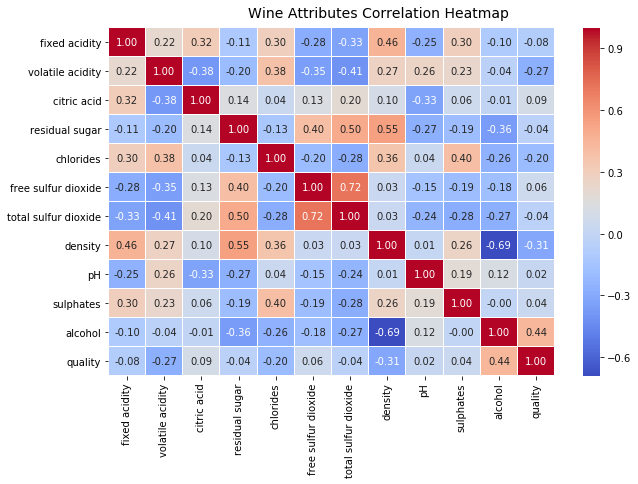

In [ ]:
# Matriz de correlaçao com mapa de calor
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

Os gradientes no mapa de calor variam com base na força da correlação entre os atributos e você pode ver claramente que é muito fácil detectar potenciais atributos que possuem fortes correlações entre si. Outra maneira de visualizar a mesma coisa é usando scatter plots (gráficos de dispersão) entre os pares de atributos de interesse. 


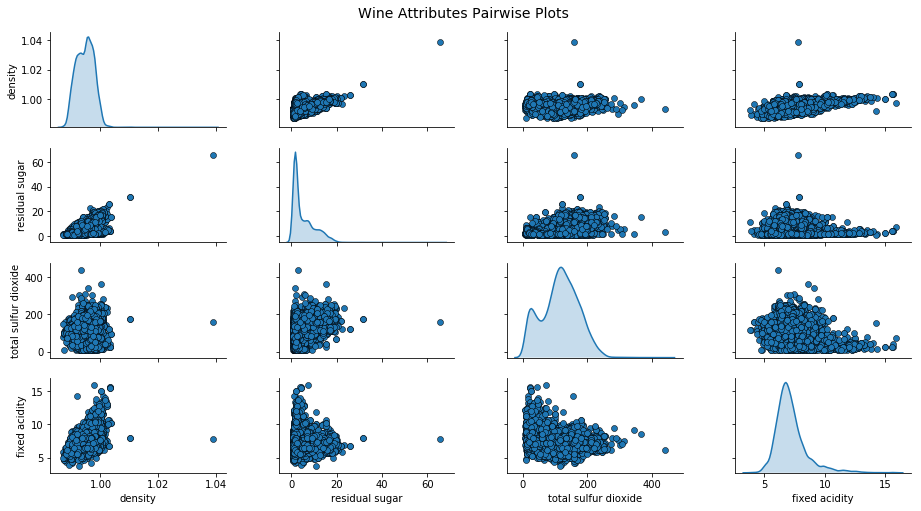

In [ ]:
# Gráficos de dispersão emparelhados
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

*Visualizando dados bidimensionais com scatter plots de pares de atributos*

Com base no gráfico acima, você pode ver que gráficos de dispersão também são uma boa maneira de observar possíveis relacionamentos ou padrões em atributos de dados duas dimensões.


---


Um ponto importante a ser observado sobre gráficos de dispersão com pares de atributos é que os gráficos são realmente simétricos. O gráfico de dispersão para quaisquer pares de atributos (X, Y) parece diferente dos mesmos atributos em (Y, X) apenas porque as escalas vertical e horizontal são diferentes. Ele não contém nenhuma informação nova.


---


Outra maneira de visualizar dados multivariados para vários atributos juntos é usando coordenadas paralelas (parallel coordinates).


Basicamente, nesta visualização, como podemos ver acima, os pontos de dados (nossas observações) são representados como segmentos de linha conectados. Cada linha vertical representa um atributo dos dados. Um conjunto completo de segmentos de linha conectados em todos os atributos representa um ponto de dados (observações). Portanto, os pontos que tendem a se agrupar parecerão mais próximos. 

Apenas olhando para esse gráfico, podemos ver claramente que a densidade é um pouco maior para os vinhos tintos em comparação com os vinhos brancos. Além disso, o açúcar residual e o dióxido de enxofre total são mais altos para os vinhos brancos em comparação com os tintos e a acidez fixa é maior para os vinhos tintos em comparação com os brancos.

Confira as estatísticas da tabela que derivamos anteriormente para validar essa suposição! 

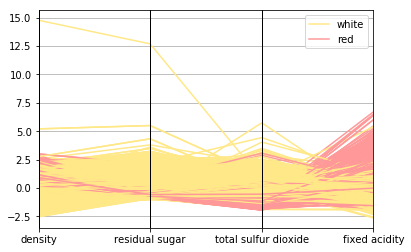

In [ ]:
# Escalando os valores dos atributos para evitar alguns outliers
Scaling attribute values to avoid few outiers
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

# "plotando" coordenadas paralelas
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))


Vamos olhar para algumas das maneiras pelas quais podemos visualizar dois atributos numéricos e contínuos. Gráficos de dispersão junto com gráficos de distribuição), em particular, são boas maneiras, não apenas para verificarmos padrões e relacionamentos, como também para vermos as distribuições individuais dos atributos.


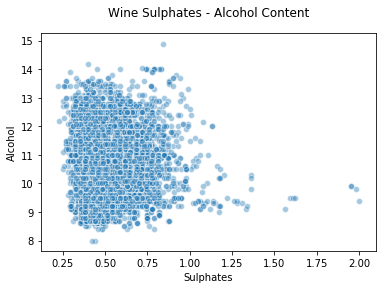

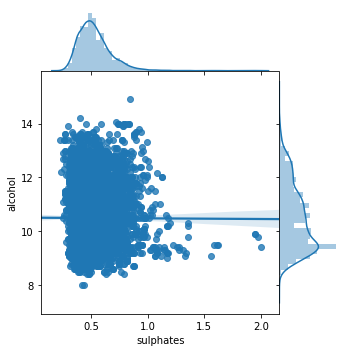

In [ ]:
# Gráfico de dispersão
plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)

Na figura acima, o scatter plot está representado no lado esquerdo e o joint plot no lado direito. Como mencionamos, você pode verificar as correlações, os relacionamentos e também as distribuições individuais no joint plot.

E como visualizamos dois atributos categóricos discretos? Uma maneira é criando subplots, ou facetas (facets), para uma das dimensões categóricas. 


<BarContainer object of 7 artists>

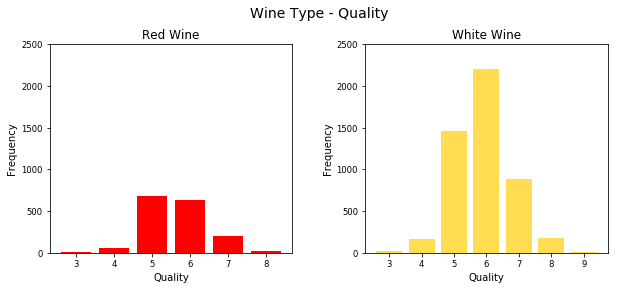

In [ ]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red')


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
ax2.bar(ww_q[0], ww_q[1], color='#FFDC51')

Embora essa seja uma boa maneira de visualizar dados categóricos, como você pode ver, usar o matplotlib resultou em escrever bastante código. Outra boa maneira de visualizar esses dados é fazendo um gráfico de barras empilhadas (stacked bars) ou de barras, cada barra representando um atributo diferente. Nós podemos usar o seaborn para fazer isso facilmente.


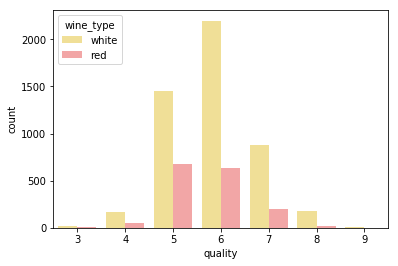

In [ ]:
# Gráfico multibarra
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

Esse gráfico definitivamente parece mais limpo e você também pode comparar facilmente as diferentes categorias a partir deste único plot (gráfico).

Vamos dar uma olhada em como visualizar atributos mistos (essencialmente numéricos e categóricos juntos) em duas dimensões. Uma maneira é usando facetas/subplots junto com histogramas genéricos ou gráficos de densidade.


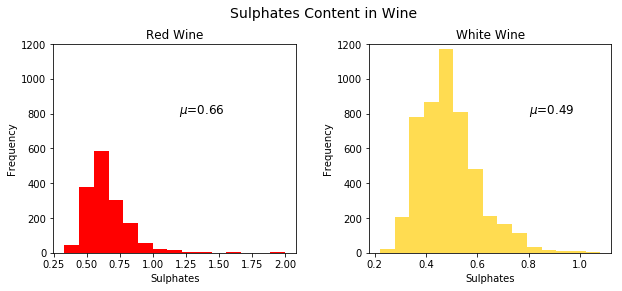

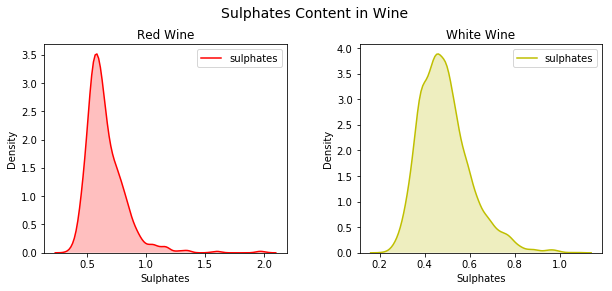

In [ ]:
# facets with histograms
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], 
                                     color='red', bins=15)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], 
                                     color='#FFDC51', bins=15)
                                     

# facets with density plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

Enquanto esta é uma boa maneira, novamente nós temos bastante código repetido, que podemos evitar ao usar seaborn e até colocar os gráficos em um único plot.

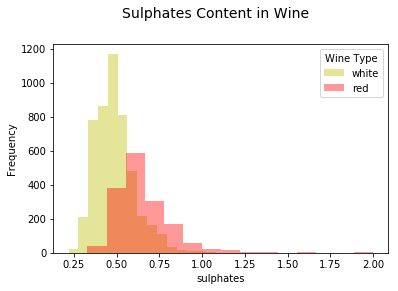

In [ ]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

Você pode ver que o gráfico gerado acima é claro e conciso e que podemos facilmente comparar as distribuições. Além disso, box plots (gráficos de caixa ou diagramas de caixa) são outra maneira de representar grupos de dados numéricos efetivamente se baseando nos diferentes valores do atributo categórico. Box plots são uma boa maneira de saber os valores dos quartis e também de outliers (pontos fora da curva) em potencial.


Text(0, 0.5, 'Wine Alcohol %')

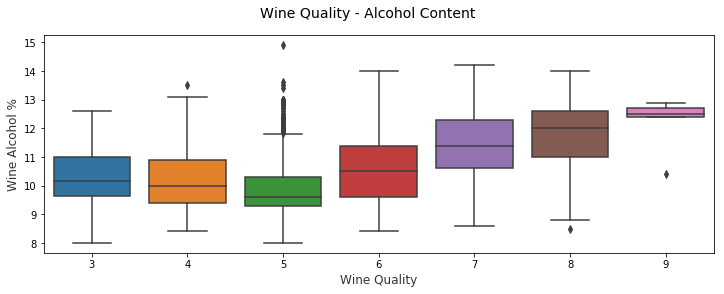

In [ ]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Outra visualização similar são violin plots (gráficos de violino), que são uma outra maneira efetiva de visualizar dados numéricos agrupados usando gráficos de densidade do kernel/núcleo (mostram a probabilidade da densidade dos dados em diferentes valores).


Text(0, 0.5, 'Wine Sulphates')

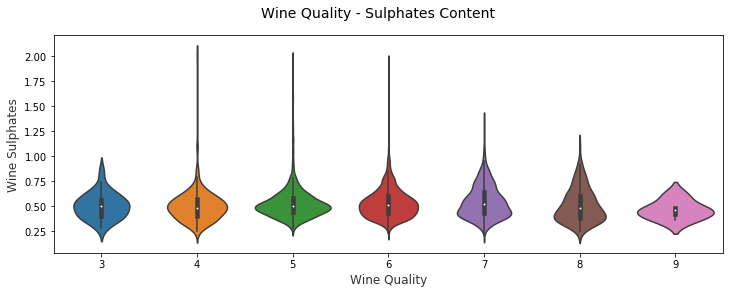

In [ ]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

Você pode ver claramente os gráficos de densidade acima para as diferentes categorias de qualidade de vinho para o sulfato de vinho.

Visualizar dados até duas dimensões é bastante simples, mas começa a se tornar complexo à medida que o número de dimensões (atributos) começa a aumentar. A razão é porque estamos atados às duas dimensões de nossos dispositivos de exibição e nosso ambiente.

Para dados tridimensionais, podemos introduzir uma falsa noção de profundidade tomando um eixo z em nosso gráfico ou usando subplots e facetas.

No entanto, para dados maiores que três dimensões, torna-se ainda mais difícil visualizar a mesma coisa. A melhor maneira de ir acima de três dimensões é usando facetas, cor, formas, tamanhos, profundidade e assim por diante.


# Visualizando dados em três dimensões (3d)

Considerando três atributos ou dimensões nos dados, podemos visualizá-los usando um gráfico de dispersão de pares e introduzir a noção de cor ou tonalidade de cor para separar valores em uma dimensão categórica.



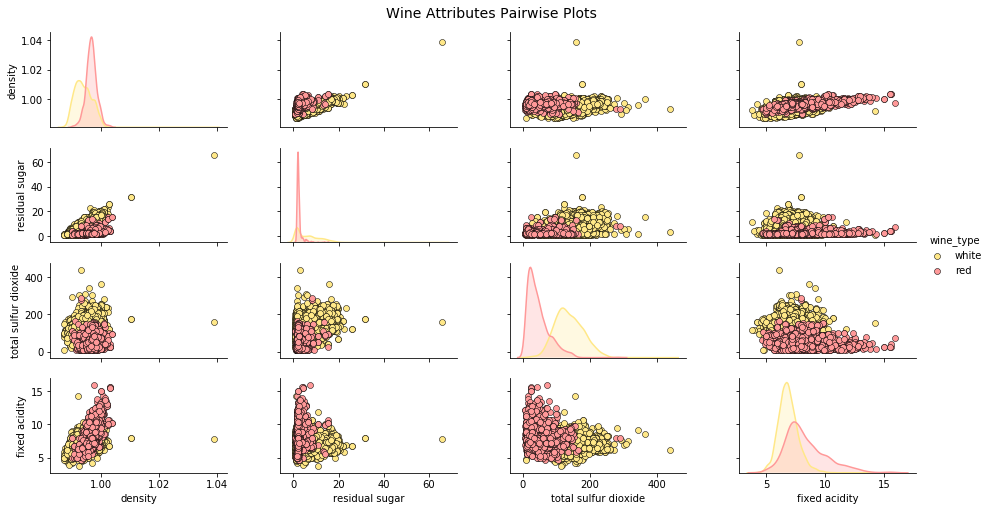

In [ ]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

O gráfico acima permite que você verifique as correlações e os padrões e também compare os grupos de vinhos. Como podemos ver claramente o dióxido de enxofre total e o açúcar residual é maior para o vinho branco em comparação com o tinto.

Vamos dar uma olhada nas estratégias para visualizar três atributos numéricos contínuos. Uma maneira seria ter duas dimensões representadas como o comprimento regular (eixo x) e largura (eixo y) e também tomar a noção de profundidade (eixo z) para a terceira dimensão.


Text(0.5, 0, 'Alcohol')

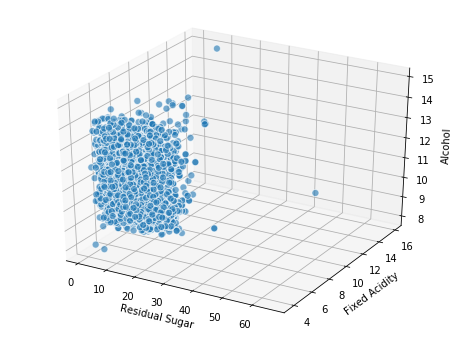

In [ ]:
# Visualizando dados numéricos 3d com gráficos de dispersão
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

Mas isso é eficaz? Na verdade, não! No entanto, podemos usar eixos regulares 2D para representar duas variáveis contínuas (gráfico de dispersão) e introduzir a terceira variável contínua como uma variável categórica ao escolhermos intervalos de largura fixa (fixed-width bins) para seus valores - popularmente, estes podem ser quantis. Com base nesses quantis (ou intervalos), podemos usar tamanho ou mesmo tonalidade para representar a terceira variável, tornando-a 3D.


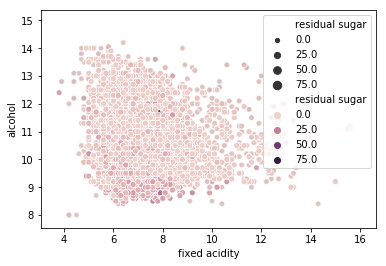

In [ ]:
# usa o tamanho para a terceira dimensão
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], 
                size=wines['residual sugar'])

# usa cor para a terceira dimensão
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], 
                hue=wines['residual sugar'], alpha=0.9)

Uma opção melhor seria usar a noção de facetas como uma terceira dimensão (essencialmente subplots) onde cada subplot indica um intervalo específico da nossa terceira variável (dimensão). Lembre-se de que precisa criar seus intervalos manualmente se você está usando a funcionalidade scatterplot do matplotlib, ao contrário do seaborn (representado no exemplo a seguir).


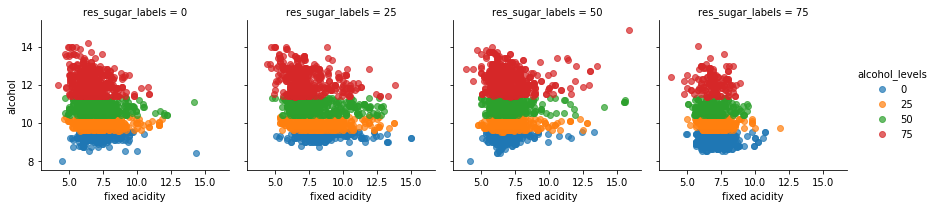

In [ ]:
# Exemplo com dados 3d contínuos usando cores e facetas

quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0', '25', '50', '75']
wines['res_sugar_labels'] = pd.qcut(wines['residual sugar'], 
                                    q=quantile_list, labels=quantile_labels)
wines['alcohol_levels'] = pd.qcut(wines['alcohol'], 
                                    q=quantile_list, labels=quantile_labels)
g = sns.FacetGrid(wines, col="res_sugar_labels", 
                  hue='alcohol_levels')
g.map(plt.scatter, "fixed acidity", "alcohol", alpha=.7)
g.add_legend();

O gráfico acima nos diz claramente que quanto mais altos os níveis de açúcar residual e o teor de álcool, menor é a acidez fixa nas amostras de vinho.

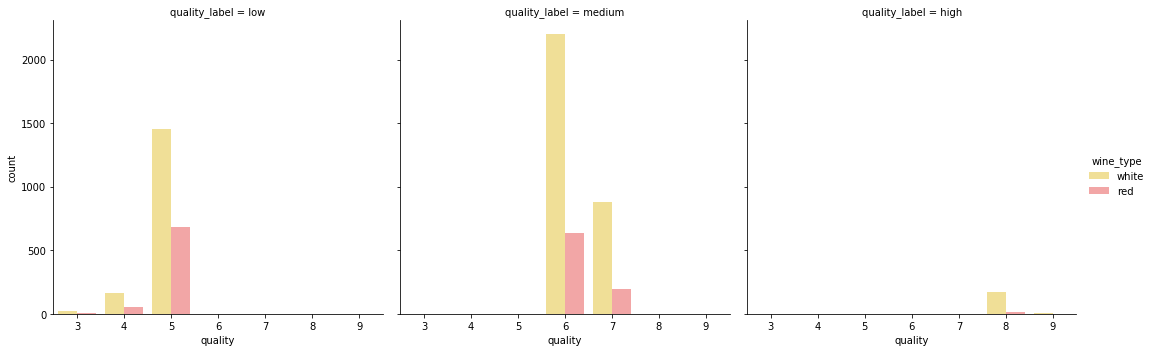

In [ ]:
# Visualizando dados categóricos 3d
# leveraging the concepts of hue and facets
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

O gráfico acima mostra claramente a frequência pertencente a cada uma das dimensões e você pode ver como isso pode ser fácil e eficaz na compreensão de insights relevantes.

Considerando a visualização para **três atributos mistos**, nós podemos usar a noção de **tonalidade** para separar nossos grupos em um dos atributos categóricos enquanto usamos visualizações convencionais, como **gráficos de dispersão**, para visualizar duas dimensões para atributos numéricos.


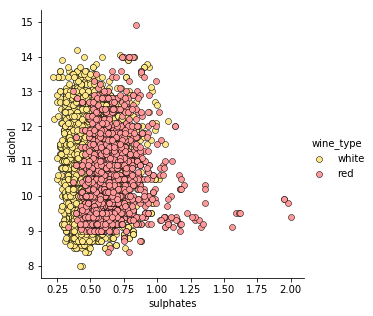

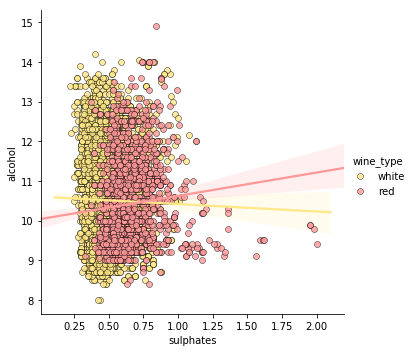

In [ ]:
# Visualizing 3-D mix data using scatter plots
# leveraging the concepts of hue for categorical dimension
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))
                  
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))  

*Visualizando atributos mistos em três dimensões usando gráficos de dispersão e o conceito de tonalidade*

Assim, a tonalidade age como um bom separador para as categorias ou grupos e, embora não exista uma correlação muito fraca, como observado acima, ainda podemos entender a partir desses gráficos que os *sulfatos* são ligeiramente mais altos para os vinhos tintos quando comparados aos brancos. Em vez de um gráfico de dispersão, você também pode usar um **gráfico de densidade do kernel** para entender os dados em três dimensões.


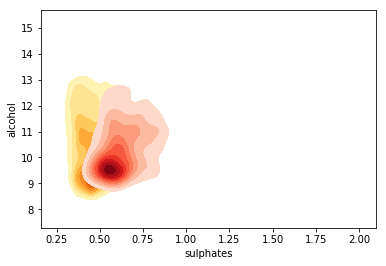

In [ ]:
# Visualizando dados 3d mistos usando gráficos de densidade do kernel baseado no conceito de matizes de cores para dimensões categóricas
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False)

É evidente e esperado que as amostras de vinho tinto tenham níveis mais altos de sulfato quando comparados aos vinhos brancos. Você também pode ver as concentrações de densidade com base na intensidade da tonalidade.

No caso de estarmos lidando com mais de um atributo categórico nas três dimensões, podemos usar a tonalidade e um dos eixos regulares para visualizar os dados e usar visualizações como box plots ou violin plots para visualizar os diferentes grupos de dados.


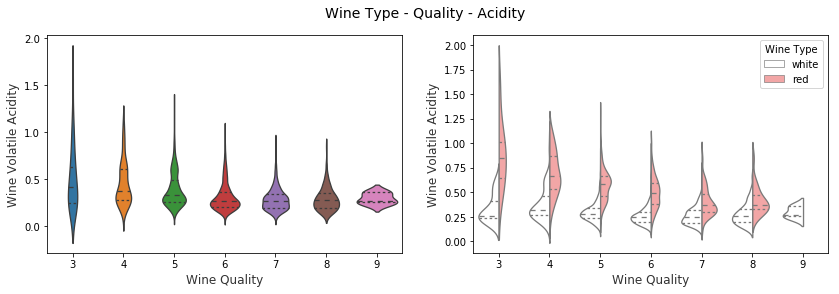

In [ ]:
# Visualizando dados 3d usando gráficos de violino, a partir de matizes de cores e eixos para > 1 dimensão categórica
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

Na figura acima, podemos ver que na visualização 3D no gráfico da direita, representamos a qualidade do vinho no eixo x e *wine_type* como a tonalidade. Podemos ver claramente alguns insights interessantes, como a acidez volátil sendo maior para os vinhos tintos, em comparação com os vinhos brancos. 

Você também pode considerar o uso de box plots para representar atributos mistos com mais de uma variável categórica de maneira semelhante.


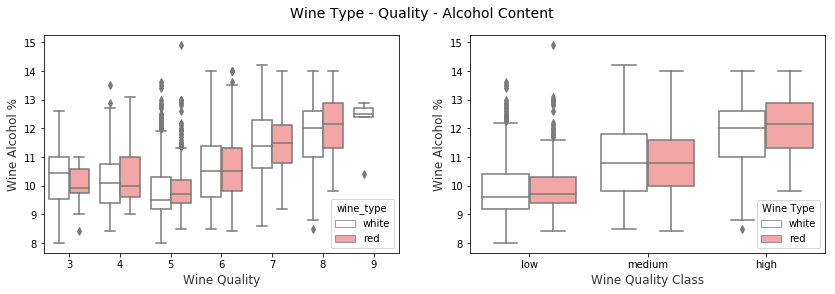

In [ ]:
# Visualizando dados 3d usando gráficos de caixa, a partir de matizes de cores e eixos para > 1 dimensão categórica

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

Podemos ver que para ambos os atributos quality (qualidade) e quality_label (atributo de qualidade), o teor de álcool do vinho aumenta com a qualidade. Além disso, vinhos tintos tendem a ter um teor médio de álcool um pouco maior em comparação com os vinhos brancos baseado na quality class (classe de qualidade). No entanto, se checarmos os quality ratings (índices de qualidade), podemos ver que para vinhos com classificações mais baixas (3 e 4), o teor médio de álcool do vinho branco é maior do que a das amostras dos vinhos tintos. Caso contrário, no geral os vinhos tintos parecem ter um teor médio de álcool ligeiramente superior em comparação com os vinhos brancos.


## Visualizando 4d
Com base em nossa discussão anterior, aproveitamos vários componentes dos gráficos para visualizar múltiplas dimensões. Uma maneira de visualizar dados em quatro dimensões é usando profundidade e tonalidade como dimensões de dados específicas em um gráfico convencional, como um gráfico de dispersão.


Text(0.5, 0, 'Fixed Acidity')

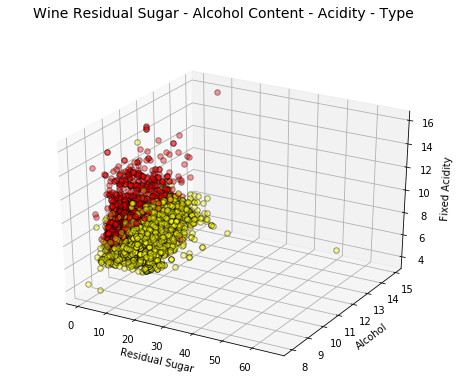

In [ ]:
# Visualizando dados 4-D usando gráficos de dispersão apoiado nos conceitos de matizes de cor e profundidade
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

O atributo wine_type (tipo de vinho) é representado pela tonalidade, o que fica evidente no gráfico acima. Também, enquanto interpretar essas visualizações começa a ficar mais difícil devido à natureza complexa dos gráficos, você ainda pode ter insights de como a acidez fixa é mais alta para vinhos tintos e o açúcar residual é maior para vinhos brancos. Claro que se houvesse alguma associação entre álcool e acidez fixa, nós poderíamos ter visto um aumento crescente ou decrescente gradual dos pontos dos dados mostrando alguma tendência.

Isso é efetivo? Mais uma vez, não! Uma estratégia para melhorar isso é manter um gráfico em 2D, mas usar tonalidade e o tamanho do ponto como dimensões de dados. Normalmente, isso seria um bubble chart (gráfico de bolhas) semelhante ao que visualizamos anteriormente.


Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

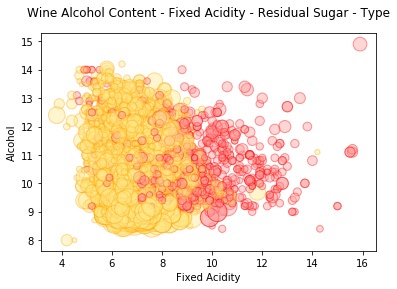

In [ ]:
# Visualizando dados mistos em 4d com gráficos de bolha apoiado nos conceitos de facetas e tamanho
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

Usamos a tonalidade para representar o wine_type (tipo de vinho) e o tamanho do ponto para representar o açúcar residual. Nós podemos ver padrões similares aqueles que observamos no gráfico anterior e os tamanhos das bolhas sendo maiores para vinho branco no geral indicam que os valores de açúcar residual são maiores para vinho branco ao comparamos com o tinto.

Agora, isso pode ser melhor do que o gráfico anterior em 4D, mas, honestamente, está ok na minha opinião. Sim, a tonalidade nos ajuda a ver quais vinhos têm maior ou menor acidez fixa, mas eu não gosto muito da noção de tamanho da bolha, uma vez que geralmente é difícil de interpretar. Podemos fazer melhor? Sim, nós podemos! Ao invés disso, vamos usar facetas como no gráfico a seguir.


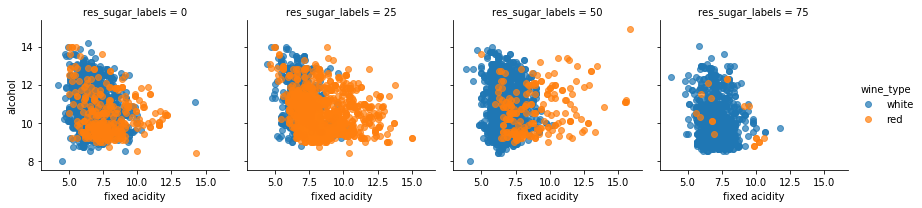

In [ ]:
g = sns.FacetGrid(wines, col="res_sugar_labels", 
                  hue='wine_type')
g.map(plt.scatter, "fixed acidity", "alcohol", alpha=.7)
g.add_legend();

Olhe para isso! Visualizações claras e concisas nos dizendo que a acidez fixa é menor para o vinho branco em comparação com o vinho tinto e também que o açúcar residual é muito maior para o vinho branco em comparação com as amostras de vinho tinto. Além disso, que quanto maior o nível de álcool, menor a acidez fixa.
	
Se temos mais de dois atributos categóricos para representar, nós podemos reutilizar nosso conceito de tonalidade e facetas para representar esses atributos e gráficos regulares como o de dispersão para representar os atributos numéricos. Vamos olhar alguns exemplos.


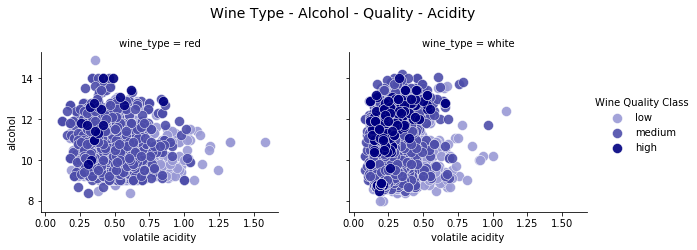

In [ ]:
# Visualizando dados mistos em 4d com gráficos de dispersão apoiado nos conceitos de facetas e matizes de cores para > 1 atributo categórico

g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

A eficácia desta visualização é verificada pelo fato de podermos detectar vários padrões facilmente. Os níveis de acidez volátil para os vinhos brancos são mais baixos e também os vinhos de alta qualidade apresentam menores níveis de acidez. Também com base em amostras de vinho branco, vinhos de alta qualidade têm níveis mais elevados de álcool e vinhos de baixa qualidade têm os níveis mais baixos de álcool!

Vamos pegar um exemplo semelhante com alguns outros atributos e construir uma visualização em quatro dimensões.


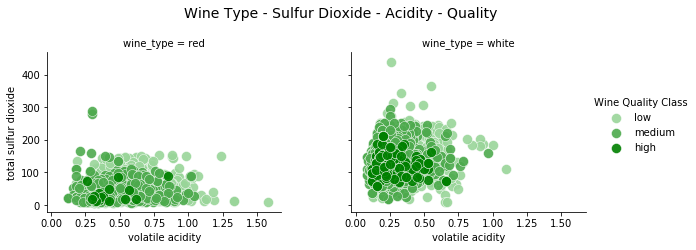

In [ ]:
# Visualizando dados mistos em 4d com gráficos de dispersão apoiado nos conceitos de facetas e matizes de cores para > 1 atributo categórico
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 4)[1:])
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Verificamos claramente que os vinhos de alta qualidade têm menor teor de dióxido de enxofre total, o que é bastante relevante se você também tem o domínio necessário de conhecimento sobre a composição do vinho. Vemos também que os níveis totais de dióxido de enxofre para o vinho tinto são mais baixos do que os do vinho branco. Os níveis de acidez volátil são, no entanto, mais altos para os vinhos tintos em vários pontos.

## Visualizando dado em cinco dimensões (5d)
Mais uma vez seguindo uma estratégia semelhante à que seguimos na seção anterior, para visualizar dados em cinco dimensões, aproveitamos vários componentes dos gráficos. Vamos usar profundidade, tonalidade e tamanho para representar três das dimensões dos dados, além dos eixos regulares que representam as outras duas dimensões. Como usamos a noção de tamanho, basicamente estaremos plotando um gráfico de bolhas tridimensional.


Text(0.5, 0, 'Fixed Acidity')

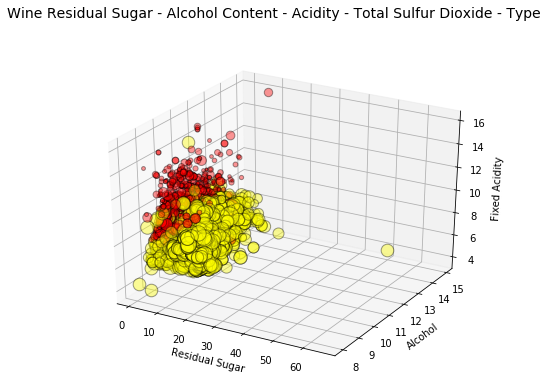

In [ ]:
# Visualizando dados em cinco dimensões usando gráficos de bolhas baseado em cores, tamanho e facetas
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Este gráfico mostra os mesmos padrões e insights sobre os quais falamos na seção anterior. No entanto, também podemos ver que, com base nos tamanhos dos pontos que representam o dióxido de enxofre total, os vinhos brancos têm níveis de dióxido de enxofre totais mais elevados em comparação com aos vinhos tintos. 

Em vez de profundidade, também podemos usar facetas com tonalidade para representar mais de um atributo categórico nessas cinco dimensões. Um dos atributos que está representando o tamanho pode ser numérico (contínuo) ou até mesmo categórico (mas podemos precisar representá-lo com números para termos os tamanhos dos pontos). Embora não mostremos isso aqui, devido à falta de atributos categóricos, sinta-se à vontade para fazer esse teste em seus próprios datasets. 



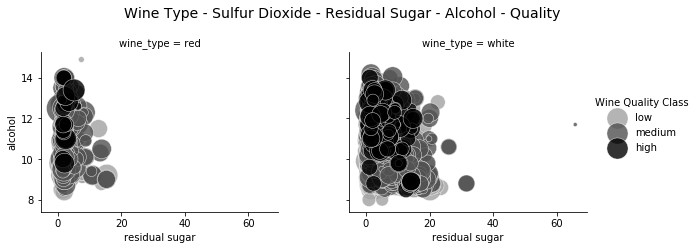

In [ ]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Esta é basicamente uma abordagem alternativa para visualizar o mesmo gráfico que plotamos anteriormente para cinco dimensões. No entanto, considerando a dificuldade em interpretar o tamanho que observamos anteriormente, você pode converter uma das variáveis, se ela for contínua, para categórica discreta usando intervalos e então usando isso como uma parâmetro adicional de facetas, como mostramos abaixo!


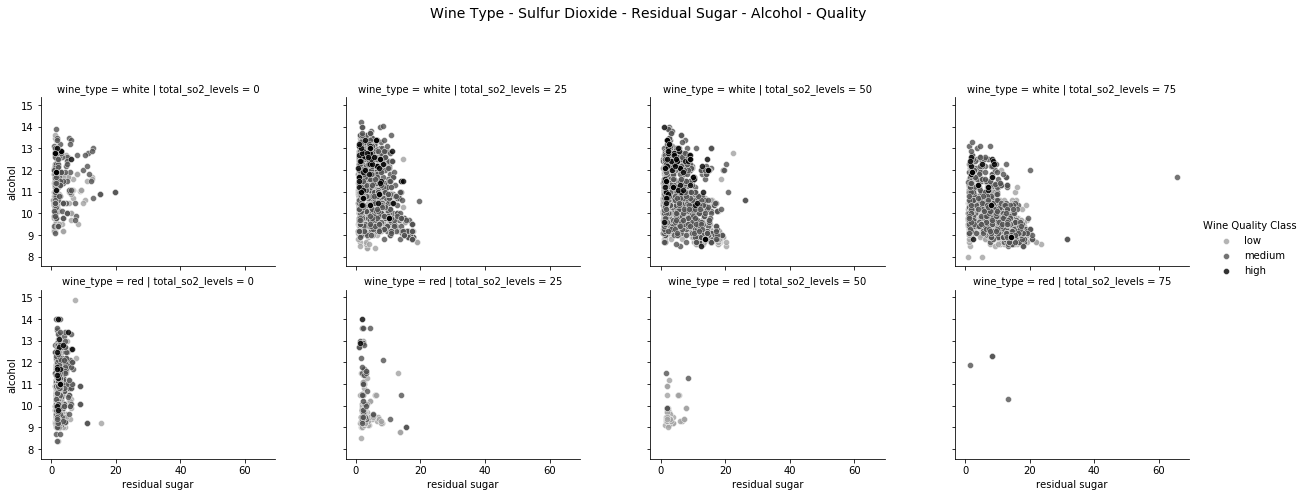

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0', '25', '50', '75']
wines['total_so2_levels'] = pd.qcut(wines['total sulfur dioxide'], 
                                    q=quantile_list, labels=quantile_labels)
g = sns.FacetGrid(wines, row="wine_type", col='total_so2_levels', hue='quality_label', 
                  hue_order=['low', 'medium', 'high'], palette=sns.light_palette('black', 4)[1:],
                  aspect=1.2, size=3.5)
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Enquanto a dimensão adicional de profundidade ou tamanho possa confundir muitas pessoas ao olhar para o gráfico que plotamos anteriormente, este gráfico, devido à vantagem das facetas, ainda permanece efetivamente no plano 2D e, portanto, é frequentemente mais eficaz e fácil de interpretar.


## Visualizando dados em seis dimensões (6d)
Agora que estamos nos divertindo (assim eu espero!), vamos adicionar outra dimensão em nossas visualizações. Vamos usar profundidade, tonalidade, tamanho e forma, além dos nossos dois eixos regulares para representar todas as seis dimensões de dados.



Text(0.5, 0, 'Fixed Acidity')

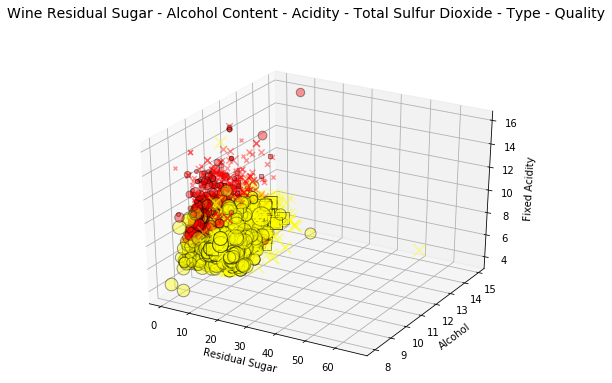

In [ ]:
#Visulizando dados 6d mistos com gráficos de dispersão baseado em cores, tamanho, profunidade e forma
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')


Uau, essas são seis dimensões em um gráfico! Nós temos quality_label (atributo qualidade) do vinho representado por formas, qualidade alta (o quadrado), média (as marcas X) e baixa (os círculos). O wine_type (tipo de vinho) é representado por tonalidade, a acidez fixa pela profundidade e o tamanho do ponto representa o teor total de dióxido de enxofre. 

Interpretar isso pode parecer um pouco desgastante, mas considere alguns componentes de cada vez ao tentar entender o que está acontecendo.

Considerando o formato e o eixo y, temos vinhos de qualidades alta e média com maiores níveis de álcool em comparação com vinhos de baixa qualidade.
Considerando a tonalidade e o tamanho, temos um teor mais alto de dióxido de enxofre total para os vinhos brancos em comparação com os vinhos tintos.
Considerando a profundidade e tonalidade, temos vinhos brancos com níveis de acidez fixos inferiores em comparação aos vinhos tintos.
Considerando tonalidade e eixo-x, temos vinhos tintos com menores teores de açúcares residuais quando comparados aos vinhos brancos.
Considerando tonalidade e forma, vinhos brancos parecem ter mais vinhos de alta qualidade quando comparados aos vinhos tintos (possivelmente devido ao tamanho maior da amostra de vinhos brancos).

Também podemos criar uma visualização em 6D removendo o componente de profundidade e usando facetas em vez de um atributo categórico.


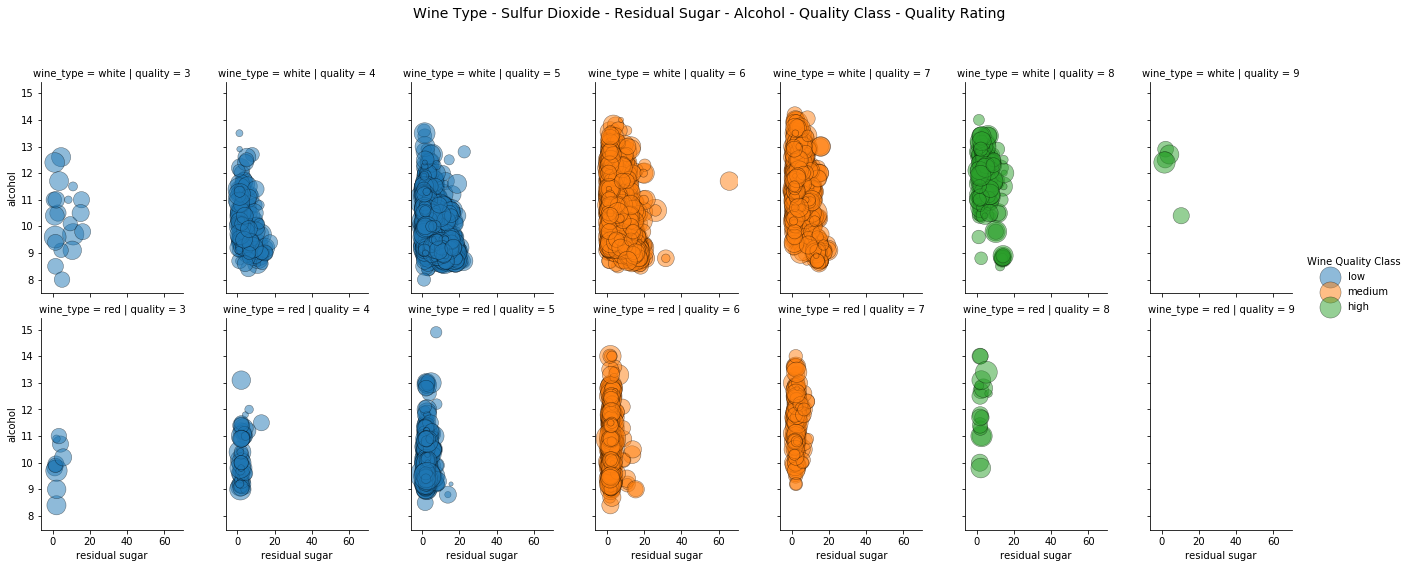

In [ ]:
#  Visualizando dados 6d com gráficos de dispersão, basaeado em cores, facetas e tamanhos
g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', size=4)
g.map(plt.scatter,  "residual sugar", "alcohol", alpha=0.5, 
      edgecolor='k', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Assim, nesse cenário, aproveitamos facetas e matiz para representar três atributos categóricos. Os dois eixos regulares e tamanho representam três atributos numéricos para a visualização de dados em 6-D.

## Podemos ir além?
A questão que não quer calar é: podemos ir além de seis dimensões? Bem, definitivamente se torna mais e mais difícil contornar as limitações de um dispositivo de renderização bidimensional para visualizar mais dimensões.

![We need to go higher](https://miro.medium.com/proxy/0*VMgpk0U6Q5vBK1vb.jpg)

Um método é usar mais facetas e subplots. Além disso, você também pode usar a noção de tempo se seu dataset tiver um aspecto temporal, conforme descrito no exemplo a seguir.


![Hans Rosling’s famous visualization of global population, health and economic indicators](https://miro.medium.com/max/457/1*vh8gqCgeBFBlnwxYRZtY2Q.gif)

Isso retrata a famosa visualização de [Hans Rosling](https://www.ted.com/speakers/hans_rosling?language=en) de retratar a população global, a saúde e vários indicadores econômicos em todos os países. Isso também foi apresentado em uma [conferência oficial do TED](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen), que eu recomendaria que todas as pessoas assistissem, se já não tiverem assistido!

Isso deve dar uma boa perspectiva sobre como aproveitar a gramática de gráficos em camadas para visualizar dados multidimensionais.

< A continuação deste tutorial será publicada no site da Escola de Dados > 